$\large{\textbf{Potenciales de acción en las membranas neuronales mediante el modelo de Hodgkin - Huxley}}$

1. **Modelo de Hodgkin-Huxley**:
   - El modelo de Hodgkin-Huxley es un modelo matemático que describe cómo cambia el potencial de membrana de una neurona en respuesta a estímulos eléctricos.
   - Se basa en el flujo de iones a través de canales iónicos específicos en la membrana celular, principalmente canales de sodio (Na+), potasio (K+), y fugas (otros iones).
   - El modelo describe la dinámica de las variables de compuerta que regulan la apertura y cierre de estos canales, como las variables de activación (m, h) y de inactivación (n).

2. **Ecuaciones diferenciales**:
   - Las ecuaciones diferenciales son ecuaciones que relacionan una función con sus derivadas. En este caso, las ecuaciones diferenciales describen cómo cambian las variables del modelo de Hodgkin-Huxley con el tiempo.
   - Para resolver el modelo, se utilizan cuatro ecuaciones diferenciales: una para el potencial de membrana (V) y tres para las variables de compuerta (m, h, n).

3. **Simulación numérica**:
   - La simulación numérica se lleva a cabo mediante el método de integración numérica de Euler. Este método aproxima la solución de las ecuaciones diferenciales al descomponer el intervalo de tiempo en pasos discretos.
   - En cada paso de tiempo, se calcula el cambio en las variables del modelo utilizando las ecuaciones diferenciales y se actualizan los valores de las variables en consecuencia.

4. **Visualización**:
   - Finalmente, se visualiza el potencial de acción neuronal simulado mediante una gráfica que muestra cómo cambia el potencial de membrana a lo largo del tiempo.

En resumen, el código implementa el modelo de Hodgkin-Huxley y utiliza métodos numéricos para simular cómo se comporta el potencial de acción neuronal bajo diferentes condiciones. Esto proporciona una herramienta útil para estudiar y comprender los procesos biofísicos involucrados en la generación y propagación de señales eléctricas en las neuronas.

Entendido, vamos a simplificar el modelo bajo la hipótesis de homogeneidad en el espacio. Esto implica que no hay variación espacial en las propiedades de la membrana neuronal a lo largo de su longitud. Por lo tanto, no necesitamos seguir las variaciones en la posición y simplemente tratamos todas las variables como constantes en el tiempo. Aquí tienes el código modificado bajo esta hipótesis:


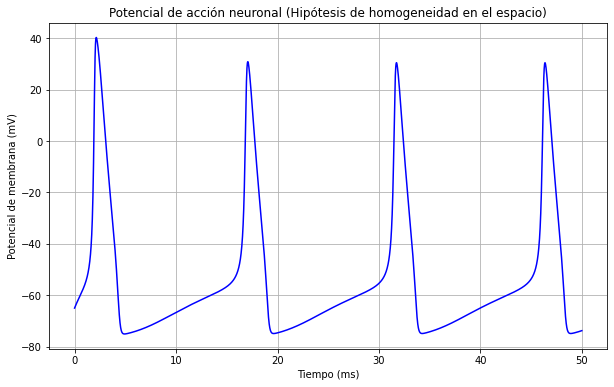

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo de Hodgkin-Huxley (constantes)
C_m = 1.0  # Capacitancia de la membrana (uF/cm^2)
g_Na = 120.0  # Conductancia máxima del canal de sodio (mS/cm^2)
g_K = 36.0  # Conductancia máxima del canal de potasio (mS/cm^2)
g_L = 0.3  # Conductancia de fuga (mS/cm^2)
E_Na = 50.0  # Potencial de equilibrio del sodio (mV)
E_K = -77.0  # Potencial de equilibrio del potasio (mV)
E_L = -54.387  # Potencial de equilibrio de la fuga (mV)

# Corriente de estimulación (uA/cm^2)
I_inj = 10.0

# Parámetros de la simulación
dt = 0.01  # Paso de tiempo (ms)
t_max = 50.0  # Tiempo máximo de simulación (ms)

# Ecuaciones diferenciales simplificadas bajo la hipótesis de homogeneidad en el espacio
def dV_dt(V, m, h, n):
    """
    Ecuación diferencial para el potencial de membrana.
    """
    return (I_inj - g_Na * m**3 * h * (V - E_Na) - g_K * n**4 * (V - E_K) - g_L * (V - E_L)) / C_m

def dmdt(V, m):
    """
    Ecuación diferencial para la variable de compuerta de activación del canal de sodio.
    """
    return alpha_m(V) * (1 - m) - beta_m(V) * m

def dhdt(V, h):
    """
    Ecuación diferencial para la variable de compuerta de inactivación del canal de sodio.
    """
    return alpha_h(V) * (1 - h) - beta_h(V) * h

def dndt(V, n):
    """
    Ecuación diferencial para la variable de compuerta de activación del canal de potasio.
    """
    return alpha_n(V) * (1 - n) - beta_n(V) * n

# Funciones alfa y beta
def alpha_m(V):
    return 0.1 * (V + 40.0) / (1.0 - np.exp(-(V + 40.0) / 10.0))

def beta_m(V):
    return 4.0 * np.exp(-(V + 65.0) / 18.0)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65.0) / 20.0)

def beta_h(V):
    return 1.0 / (1.0 + np.exp(-(V + 35.0) / 10.0))

def alpha_n(V):
    return 0.01 * (V + 55.0) / (1.0 - np.exp(-(V + 55.0) / 10.0))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65.0) / 80.0)

# Función para simular el potencial de acción usando RK4
def simulate_action_potential():
    num_steps = int(t_max / dt)
    V = np.zeros(num_steps)
    m = np.zeros(num_steps)
    h = np.zeros(num_steps)
    n = np.zeros(num_steps)
    
    V[0] = -65.0  # Potencial de membrana inicial
    m[0] = alpha_m(V[0]) / (alpha_m(V[0]) + beta_m(V[0]))  #Condiciones iniciales para variables de compuerta
    h[0] = alpha_h(V[0]) / (alpha_h(V[0]) + beta_h(V[0]))
    n[0] = alpha_n(V[0]) / (alpha_n(V[0]) + beta_n(V[0]))
    
    for i in range(1, num_steps):
        k1_V = dt * dV_dt(V[i-1], m[i-1], h[i-1], n[i-1])
        k1_m = dt * dmdt(V[i-1], m[i-1])
        k1_h = dt * dhdt(V[i-1], h[i-1])
        k1_n = dt * dndt(V[i-1], n[i-1])
        
        k2_V = dt * dV_dt(V[i-1] + 0.5 * k1_V, m[i-1] + 0.5 * k1_m, h[i-1] + 0.5 * k1_h, n[i-1] + 0.5 * k1_n)
        k2_m = dt * dmdt(V[i-1] + 0.5 * k1_V, m[i-1] + 0.5 * k1_m)
        k2_h = dt * dhdt(V[i-1] + 0.5 * k1_V, h[i-1] + 0.5 * k1_h)
        k2_n = dt * dndt(V[i-1] + 0.5 * k1_V, n[i-1] + 0.5 * k1_n)
        
        k3_V = dt * dV_dt(V[i-1] + 0.5 * k2_V, m[i-1] + 0.5 * k2_m, h[i-1] + 0.5 * k2_h, n[i-1] + 0.5 * k2_n)
        k3_m = dt * dmdt(V[i-1] + 0.5 * k2_V, m[i-1] + 0.5 * k2_m)
        k3_h = dt * dhdt(V[i-1] + 0.5 * k2_V, h[i-1] + 0.5 * k2_h)
        k3_n = dt * dndt(V[i-1] + 0.5 * k2_V, n[i-1] + 0.5 * k2_n)
        
        k4_V = dt * dV_dt(V[i-1] + k3_V, m[i-1] + k3_m, h[i-1] + k3_h, n[i-1] + k3_n)
        k4_m = dt * dmdt(V[i-1] + k3_V, m[i-1] + k3_m)
        k4_h = dt * dhdt(V[i-1] + k3_V, h[i-1] + k3_h)
        k4_n = dt * dndt(V[i-1] + k3_V, n[i-1] + k3_n)
        
        V[i] = V[i-1] + (k1_V + 2 * k2_V + 2 * k3_V + k4_V) / 6
        m[i] = m[i-1] + (k1_m + 2 * k2_m + 2 * k3_m + k4_m) / 6
        h[i] = h[i-1] + (k1_h + 2 * k2_h + 2 * k3_h + k4_h) / 6
        n[i] = n[i-1] + (k1_n + 2 * k2_n + 2 * k3_n + k4_n) / 6
        
    return V

# Simulación del potencial de acción
V = simulate_action_potential()
t = np.arange(0, t_max, dt)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(t, V, 'b')
plt.title('Potencial de acción neuronal (Hipótesis de homogeneidad en el espacio)')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de membrana (mV)')
plt.grid(True)
plt.show()


Para obtener resultados más adaptados a la realidad o para estudiar diferentes aspectos del comportamiento neuronal, puedes variar varios aspectos del código. Aquí hay algunas sugerencias:

1. **Parámetros del modelo de Hodgkin-Huxley**:
   - Puedes ajustar los valores de los parámetros como las conductancias máximas de los canales iónicos (g_Na, g_K, g_L) y los potenciales de equilibrio (E_Na, E_K, E_L). Cambiar estos valores puede simular diferentes tipos de neuronas o condiciones fisiológicas.
   
2. **Corriente de estimulación**:
   - Modifica la corriente de estimulación (I_inj) para simular diferentes tipos de estímulos aplicados a la neurona. Esto puede representar la entrada de señales desde otras neuronas o estímulos externos.

3. **Condiciones iniciales**:
   - Experimenta con diferentes valores iniciales para el potencial de membrana y las variables de compuerta (m, h, n). Estos valores pueden influir en la excitabilidad y el comportamiento de la neurona.

4. **Método de integración numérica**:
   - Aunque el código actual utiliza el método de Runge-Kutta de cuarto orden (RK4), puedes probar otros métodos de integración numérica, como el método de Euler o métodos más avanzados como el método de Dormand-Prince, para ver cómo afectan a los resultados.

5. **Duración y paso de tiempo de la simulación**:
   - Ajusta el tiempo máximo de simulación (t_max) y el paso de tiempo (dt) para capturar diferentes escalas temporales del comportamiento neuronal.

6. **Visualización y análisis de resultados**:
   - Utiliza herramientas de visualización y análisis adicionales para examinar los resultados de manera más detallada. Por ejemplo, puedes trazar múltiples gráficas para diferentes condiciones o realizar análisis estadísticos de los datos generados.

Experimentar con estos aspectos te permitirá explorar y entender mejor el comportamiento de las neuronas y cómo responden a diferentes estímulos y condiciones.

Los potenciales de acción descritos por el modelo de Hodgkin-Huxley son específicos de las membranas neuronales. El modelo fue desarrollado para explicar cómo las neuronas generan y conducen señales eléctricas a lo largo de sus membranas celulares. Estos potenciales de acción son un fenómeno eléctrico que ocurre en la membrana de las neuronas cuando se alcanza cierto umbral de excitación.

Cada neurona tiene una membrana celular que está polarizada eléctricamente, lo que significa que hay una diferencia de potencial a través de la membrana. Cuando la neurona es estimulada, puede ocurrir una rápida inversión de esta diferencia de potencial, lo que resulta en el potencial de acción.

Entonces, en el contexto del modelo de Hodgkin-Huxley, los potenciales de acción se refieren a los cambios transitorios en el potencial de membrana de una neurona que son el resultado de la apertura y cierre de canales iónicos específicos en la membrana. Estos potenciales de acción son fundamentales para la transmisión de señales en el sistema nervioso.